In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# Use ML to categorize Iris flowers by species.
# Uses TF's eager execution to:
# 1. Build a model
# 2. Train the model on example data
# 3. Use the model to make predictions about unknown data

In [3]:
# Configure imports and eager execution
# Eager execution makes TF evaluate operations immediately,
# returning concrete values instead of creating a computational
# graph that is executed later.
from __future__ import absolute_import, division, \
    print_function, unicode_literals
import os
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
tf.enable_eager_execution()

In [5]:
print('TensorFlow version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: True


In [6]:
# Import and parse the training dataset.
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

In [7]:
train_dataset_fp = tf.keras.utils.get_file(\
                    os.path.basename(train_dataset_url), \
                    origin=train_dataset_url)

In [8]:
print('Local copy of the dataset file: {}'.format(train_dataset_fp))

Local copy of the dataset file: /home/allisonrmcalister/.keras/datasets/iris_training.csv


In [9]:
# Inspect the data
# Line 1: Header
# Subsequent rows: data records, one ex per line where:
# - The first 4 fields are features (characteristics)
# - The last column is the label.
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [10]:
# Column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length',\
               'petal_width', 'species']

In [11]:
feature_names = column_names[:-1]
label_name = column_names[-1]

In [12]:
print('Features: {}'.format(feature_names))
print('Label: {}'.format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [13]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [14]:
# Create a tf.data.Dataset
batch_size = 32
train_dataset = tf.contrib.data.make_csv_dataset(\
                    train_dataset_fp,\
                    batch_size, \
                    column_names=column_names,\
                    label_name=label_name,\
                    num_epochs=1)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [15]:
features, labels = next(iter(train_dataset))

In [16]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=65, shape=(32,), dtype=float32, numpy=
              array([5.8, 7.3, 4.6, 6. , 7.2, 4.9, 6.8, 6.6, 5.9, 5.8, 6.1, 6.3, 4.4,
                     7.7, 4.8, 4.9, 6.3, 5.7, 5.5, 5.3, 6.5, 4.9, 5.5, 6. , 5.8, 4.4,
                     6.1, 5. , 5. , 7.2, 7.4, 5. ], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([2.7, 2.9, 3.1, 2.2, 3.6, 3.1, 3. , 3. , 3.2, 2.6, 2.6, 2.5, 3.2,
                     3. , 3. , 3.1, 3.4, 3. , 3.5, 3.7, 3. , 2.5, 2.4, 3. , 4. , 3. ,
                     3. , 3.2, 3.4, 3.2, 2.8, 3.5], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=63, shape=(32,), dtype=float32, numpy=
              array([5.1, 6.3, 1.5, 5. , 6.1, 1.5, 5.5, 4.4, 4.8, 4. , 5.6, 5. , 1.3,
                     6.1, 1.4, 1.5, 5.6, 4.2, 1.3, 1.5, 5.2, 4.5, 3.8, 4.8, 1.2, 1.3,
                     4.9, 1.2, 1.5, 6. , 6.1, 1.6],

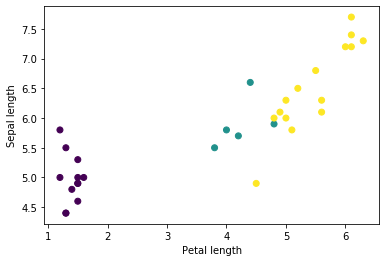

In [17]:
# Plot a few features from this batch of features.
plt.scatter(features['petal_length'].numpy(),\
           features['sepal_length'].numpy(),\
           c=labels.numpy(),\
           cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [18]:
def pack_features_vector(features, labels):
    '''Pack the features into a single array.'''
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [19]:
# Pack into the training dataset
train_dataset = train_dataset.map(pack_features_vector)

In [20]:
train_dataset

<DatasetV1Adapter shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [21]:
features, labels = next(iter(train_dataset))

In [22]:
print(features[:5])

tf.Tensor(
[[5.8 2.7 5.1 1.9]
 [7.3 2.9 6.3 1.8]
 [4.6 3.1 1.5 0.2]
 [6.  2.2 5.  1.5]
 [7.2 3.6 6.1 2.5]], shape=(5, 4), dtype=float32)


In [23]:
# Create a model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, \
                         input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [24]:
# Using the model
predictions = model(features)

In [25]:
predictions[:5]

<tf.Tensor: id=206, shape=(5, 3), dtype=float32, numpy=
array([[-2.1769226 , -1.0750549 ,  0.91357064],
       [-2.3348913 , -1.2951136 ,  0.91733754],
       [-1.3367846 , -0.6090543 ,  0.6590032 ],
       [-1.8477445 , -1.088833  ,  0.7442108 ],
       [-2.782983  , -1.3328713 ,  1.2060192 ]], dtype=float32)>

In [26]:
# Each example returns a logit for each class.
# To convert these logits to a "probability" for each class, use
# the softmax function.
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=212, shape=(5, 3), dtype=float32, numpy=
array([[0.03846494, 0.11577108, 0.845764  ],
       [0.03369673, 0.09531417, 0.87098914],
       [0.09589222, 0.19853295, 0.70557475],
       [0.06063617, 0.1295158 , 0.80984807],
       [0.01687349, 0.07194165, 0.91118485]], dtype=float32)>

In [27]:
# Take the tf.argmax across class gives us the predicted class
# index. However, the model hasn't been trained yet, so these 
# aren't good predictions.
print('Prediction: {}'.format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 2 0 2 2 0 2 1 1 1 2 2 0 2 0 0 2 1 0 0 2 2 1 2 0 0 2 0 0 2 2 0]


In [28]:
# Train the model
# Define loss and gradient function
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y,\
                                                 logits=y_)

In [29]:
l = loss(model, features, labels)

In [30]:
print("Loss test: {}".format(l))

Loss test: 1.3275840282440186


In [31]:
# Use the tf.GradientTape context to calculate the gradients
# used to optimize the model.
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, \
            tape.gradient(loss_value, model.trainable_variables)

In [32]:
# Create an optimizer, which applies the computed gradients to the
# model's variables to minimize the loss function.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [33]:
# We'll use this to calculate a single optimization step.
loss_value, grads = grad(model, features, labels)

In [34]:
print('Step: {}, Initial Loss: {}'.format(global_step.numpy(),\
                                         loss_value.numpy()))

Step: 0, Initial Loss: 1.3275840282440186


In [35]:
optimizer.apply_gradients(zip(grads, model.trainable_variables),\
                         global_step)

In [36]:
print("Step: {},     Loss: {}".format(global_step.numpy(),\
                    loss(model, features, labels).numpy()))

Step: 1,     Loss: 1.1757349967956543


In [37]:
# Training loop
from tensorflow import contrib

In [38]:
tfe = contrib.eager

In [39]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201
for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    # Training loop - using batches of 32
    for x,y in train_dataset:
        # Optimize the model.
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, \
                model.trainable_variables), global_step)
        # Track progress
        epoch_loss_avg(loss_value)
        # Compare predicted level to actual label
        epoch_accuracy(tf.argmax(model(x), axis=1, \
                                 output_type=tf.int32), y)
        
        # End epoch
        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())
    
        if epoch % 50 == 0:
            print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".\
                  format(epoch, epoch_loss_avg.result(), \
                        epoch_accuracy.result()))

Epoch 000: Loss: 1.176, Accuracy: 46.875%
Epoch 000: Loss: 1.230, Accuracy: 39.062%
Epoch 000: Loss: 1.185, Accuracy: 37.500%
Epoch 000: Loss: 1.174, Accuracy: 35.000%
Epoch 050: Loss: 0.312, Accuracy: 96.875%
Epoch 050: Loss: 0.310, Accuracy: 96.875%
Epoch 050: Loss: 0.313, Accuracy: 97.917%
Epoch 050: Loss: 0.316, Accuracy: 97.500%
Epoch 100: Loss: 0.222, Accuracy: 96.875%
Epoch 100: Loss: 0.221, Accuracy: 96.875%
Epoch 100: Loss: 0.216, Accuracy: 97.917%
Epoch 100: Loss: 0.209, Accuracy: 97.500%
Epoch 150: Loss: 0.162, Accuracy: 96.875%
Epoch 150: Loss: 0.171, Accuracy: 96.875%
Epoch 150: Loss: 0.166, Accuracy: 97.917%
Epoch 150: Loss: 0.159, Accuracy: 98.333%
Epoch 200: Loss: 0.125, Accuracy: 96.875%
Epoch 200: Loss: 0.140, Accuracy: 96.875%
Epoch 200: Loss: 0.139, Accuracy: 97.917%
Epoch 200: Loss: 0.132, Accuracy: 98.333%


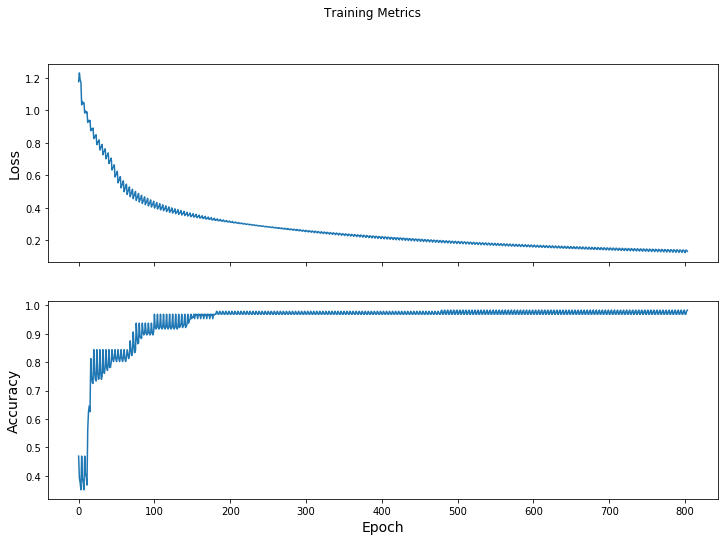

In [40]:
# Visualize the loss function over time.
fig, axes = plt.subplots(2, sharex=True, figsize=(12,8))

fig.suptitle('Training Metrics')
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [41]:
# Evaluate the model's effectiveness
# Setup the test dataset
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

In [42]:
test_fp = tf.keras.utils.get_file(\
    fname=os.path.basename(test_url), origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 1us/step


In [44]:
test_dataset = tf.contrib.data.make_csv_dataset(\
                    test_fp,\
                    batch_size,\
                    column_names=column_names,\
                    label_name='species',\
                    num_epochs=1,\
                    shuffle=False)

In [45]:
test_dataset = test_dataset.map(pack_features_vector)

In [46]:
# Evaluate the model on the test dataset
test_accuracy = tfe.metrics.Accuracy()

In [47]:
for (x,y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction,y)

In [48]:
print('Test set accuracy: {:.3%}'.format(test_accuracy.result()))

Test set accuracy: 96.667%


In [49]:
# Note that the model is usually correct.
tf.stack([y,prediction], axis=1)

<tf.Tensor: id=114309, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [50]:
# Use the trained model to make predictions.
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

In [51]:
predictions = model(predict_dataset)

In [52]:
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(\
                                    i, name, 100*p))

Example 0 prediction: Iris setosa (98.6%)
Example 1 prediction: Iris versicolor (92.7%)
Example 2 prediction: Iris virginica (73.4%)
